#### Mortality data processing

In [50]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
mortality = pd.read_excel('/home/h6x/git_projects/ornl-svi-data-processing/raw_data/HepVu_County_Opioid_Indicators_05DEC22.xlsx')

In [52]:
mortality.head()

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
0,1001,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6
1,1003,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4
2,1005,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6
3,1007,AL,Bibb County,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3
4,1009,AL,Blount County,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2


In [53]:
# make GEOID a string
mortality['GEO_ID'] = mortality['GEO ID'].astype(str)

In [54]:
# drop GEO ID
mortality = mortality.drop(columns=['GEO ID'])

In [55]:
# if GEOID is less than 5 characters, add a 0 to the front
mortality['GEO_ID'] = mortality['GEO_ID'].apply(lambda x: x.zfill(5))

In [56]:
mortality.head()

,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020,GEO_ID
0,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6,01001
1,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4,01003
2,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6,01005
3,AL,Bibb County,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3,01007
4,AL,Blount County,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2,01009


In [57]:
# rename columns
mortality = mortality.rename(columns={'GEO_ID':'GEOID',
                                      'State Abbreviation':'ST_ABB',
                                      'Opioid Prescription Rate 2020':'PRIS_20',
                                      'Narcotic Overdose Mortality Rate 2014':'MOR_14',
                                      'Narcotic Overdose Mortality Rate 2015':'MOR_15',
                                      'Narcotic Overdose Mortality Rate 2016':'MOR_16',
                                      'Narcotic Overdose Mortality Rate 2017':'MOR_17',
                                      'Narcotic Overdose Mortality Rate 2018':'MOR_18',
                                      'Narcotic Overdose Mortality Rate 2019':'MOR_19',
                                      'Narcotic Overdose Mortality Rate 2020':'MOR_20'
                                      })

In [58]:
mortality = mortality.drop(columns=['County Name'])

In [59]:
mortality.head()

,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,GEOID
0,AL,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6,01001
1,AL,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4,01003
2,AL,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6,01005
3,AL,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3,01007
4,AL,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2,01009


In [60]:
# make PRIS_20 min max scale
mortality['PRIS_20'] = (mortality['PRIS_20'] - mortality['PRIS_20'].min()) / (mortality['PRIS_20'].max() - mortality['PRIS_20'].min()) * 100
mortality['MOR_14'] = (mortality['MOR_14'] - mortality['MOR_14'].min()) / (mortality['MOR_14'].max() - mortality['MOR_14'].min()) * 100
mortality['MOR_15'] = (mortality['MOR_15'] - mortality['MOR_15'].min()) / (mortality['MOR_15'].max() - mortality['MOR_15'].min()) * 100
mortality['MOR_16'] = (mortality['MOR_16'] - mortality['MOR_16'].min()) / (mortality['MOR_16'].max() - mortality['MOR_16'].min()) * 100
mortality['MOR_17'] = (mortality['MOR_17'] - mortality['MOR_17'].min()) / (mortality['MOR_17'].max() - mortality['MOR_17'].min()) * 100
mortality['MOR_18'] = (mortality['MOR_18'] - mortality['MOR_18'].min()) / (mortality['MOR_18'].max() - mortality['MOR_18'].min()) * 100
mortality['MOR_19'] = (mortality['MOR_19'] - mortality['MOR_19'].min()) / (mortality['MOR_19'].max() - mortality['MOR_19'].min()) * 100
mortality['MOR_20'] = (mortality['MOR_20'] - mortality['MOR_20'].min()) / (mortality['MOR_20'].max() - mortality['MOR_20'].min()) * 100

In [61]:
mortality.head()

,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,GEOID
0,AL,25.811884,17.750258,14.483320,18.978805,12.491694,16.126418,14.410135,12.700370,01001
1,AL,17.801299,27.863777,23.596420,24.662813,16.013289,19.367909,18.606492,22.441430,01003
2,AL,7.649747,13.828689,10.984540,14.161850,9.833887,11.507293,11.638955,10.234279,01005
3,AL,8.130864,27.038184,20.829943,30.443160,20.398671,26.012966,22.486144,22.379778,01007
4,AL,7.649747,28.482972,22.701383,30.539499,23.920266,23.419773,23.198733,20.468557,01009


In [62]:
# rename column STCNTY
mortality = mortality.rename(columns={'GEOID':'STCNTY'})

In [63]:
mortality.head()

,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,STCNTY
0,AL,25.811884,17.750258,14.483320,18.978805,12.491694,16.126418,14.410135,12.700370,01001
1,AL,17.801299,27.863777,23.596420,24.662813,16.013289,19.367909,18.606492,22.441430,01003
2,AL,7.649747,13.828689,10.984540,14.161850,9.833887,11.507293,11.638955,10.234279,01005
3,AL,8.130864,27.038184,20.829943,30.443160,20.398671,26.012966,22.486144,22.379778,01007
4,AL,7.649747,28.482972,22.701383,30.539499,23.920266,23.419773,23.198733,20.468557,01009


### add geometry column to mortality

In [64]:
import geopandas as gpd

In [65]:
svi = gpd.read_file('/home/h6x/git_projects/ornl-svi-data-processing/raw_data/svi/2018/SVI2018_US_county.gdb')

In [66]:
svi.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Length,Shape_Area,geometry
0,35,NEW MEXICO,NM,Rio Arriba,35039,"Rio Arriba County, New Mexico",5860.869195,39307,0,20044,...,1,-999,4160,588,10.6,1.5,32290,6.452810,1.536344,"MULTIPOLYGON (((-107.62554 36.56587, -107.6252..."
1,01,ALABAMA,AL,Autauga,01001,"Autauga County, Alabama",594.443459,55200,0,23315,...,0,0,3875,508,7.1,0.9,37301,2.052740,0.150256,"MULTIPOLYGON (((-86.92120 32.65754, -86.92035 ..."
2,01,ALABAMA,AL,Blount,01009,"Blount County, Alabama",644.830460,57645,0,24222,...,0,0,6303,732,11.0,1.3,40036,2.392326,0.164403,"MULTIPOLYGON (((-86.96336 33.85822, -86.95967 ..."
3,01,ALABAMA,AL,Butler,01013,"Butler County, Alabama",776.838201,20025,0,10026,...,0,0,2005,340,10.2,1.7,17280,1.818327,0.191747,"MULTIPOLYGON (((-86.90894 31.96167, -86.87498 ..."
4,01,ALABAMA,AL,Calhoun,01015,"Calhoun County, Alabama",605.867251,115098,0,53682,...,0,0,10686,796,9.4,0.7,117894,2.194795,0.154336,"MULTIPOLYGON (((-86.14622 33.70218, -86.14577 ..."


In [67]:
svi.columns

Index(['ST', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI',
       'E_TOTPOP', 'M_TOTPOP', 'E_HU',
       ...
       'F_THEME4', 'F_TOTAL', 'E_UNINSUR', 'M_UNINSUR', 'EP_UNINSUR',
       'MP_UNINSUR', 'E_DAYPOP', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object', length=126)

In [68]:
# get the colm names starting with EP
ep_cols = [col for col in svi.columns if col.startswith('EP')]
ep_cols

['EP_POV',
 'EP_UNEMP',
 'EP_PCI',
 'EP_NOHSDP',
 'EP_AGE65',
 'EP_AGE17',
 'EP_DISABL',
 'EP_SNGPNT',
 'EP_MINRTY',
 'EP_LIMENG',
 'EP_MUNIT',
 'EP_MOBILE',
 'EP_CROWD',
 'EP_NOVEH',
 'EP_GROUPQ',
 'EPL_POV',
 'EPL_UNEMP',
 'EPL_PCI',
 'EPL_NOHSDP',
 'EPL_AGE65',
 'EPL_AGE17',
 'EPL_DISABL',
 'EPL_SNGPNT',
 'EPL_MINRTY',
 'EPL_LIMENG',
 'EPL_MUNIT',
 'EPL_MOBILE',
 'EPL_CROWD',
 'EPL_NOVEH',
 'EPL_GROUPQ',
 'EP_UNINSUR']

In [69]:
# filter svi to few columns
# svi = svi[['FIPS','geometry']]

In [70]:
svi = svi[[
         'FIPS','geometry','EP_POV','EP_UNEMP', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 
        'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ'
    ]]

In [71]:
svi.head()

,FIPS,geometry,EP_POV,EP_UNEMP,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ
0,35039,"MULTIPOLYGON (((-107.62554 36.56587, -107.6252...",-999.0,-999.0,13.8,10.6,18.0,23.7,16.1,10.7,2.1,87.5,0.3,38.8,2.1,6.2,1.7
1,01001,"MULTIPOLYGON (((-86.92120 32.65754, -86.92035 ...",15.4,4.2,11.3,7.1,14.6,24.2,19.3,7.5,0.8,25.0,3.8,18.4,1.4,5.6,1.0
2,01009,"MULTIPOLYGON (((-86.96336 33.85822, -86.95967 ...",14.4,4.1,19.8,11.0,17.8,23.4,14.2,7.0,1.7,12.9,0.9,25.2,1.6,4.2,0.9
3,01013,"MULTIPOLYGON (((-86.90894 31.96167, -86.87498 ...",23.5,6.7,15.4,10.2,19.0,22.8,17.7,10.5,0.5,48.1,1.3,26.2,1.8,7.8,1.6
4,01015,"MULTIPOLYGON (((-86.14622 33.70218, -86.14577 ...",18.6,8.8,15.9,9.4,16.8,21.9,20.8,10.4,1.0,27.5,3.7,14.7,1.7,5.8,2.7


In [72]:
# find how many -999 values are there in each column
svi[svi == -999].count()

FIPS          0
geometry      0
EP_POV        1
EP_UNEMP      1
EP_NOHSDP     0
EP_UNINSUR    0
EP_AGE65      0
EP_AGE17      0
EP_DISABL     0
EP_SNGPNT     0
EP_LIMENG     0
EP_MINRTY     0
EP_MUNIT      0
EP_MOBILE     0
EP_CROWD      0
EP_NOVEH      0
EP_GROUPQ     0
dtype: int64

In [73]:
# replace -999 with 0
svi = svi.replace(-999,0)

In [74]:
svi.shape

(3142, 17)

In [75]:
mortality.shape

(3221, 10)

In [76]:
# add svi data to mortality data by joining on STCNTY and FIPS
mortality = mortality.merge(svi, left_on='STCNTY', right_on='FIPS', how='left')

In [77]:
mortality.head()

,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,STCNTY,...,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ
0,AL,25.811884,17.750258,14.483320,18.978805,12.491694,16.126418,14.410135,12.700370,01001,...,24.2,19.3,7.5,0.8,25.0,3.8,18.4,1.4,5.6,1.0
1,AL,17.801299,27.863777,23.596420,24.662813,16.013289,19.367909,18.606492,22.441430,01003,...,21.9,14.0,5.7,0.5,17.0,18.3,11.7,1.3,3.4,1.4
2,AL,7.649747,13.828689,10.984540,14.161850,9.833887,11.507293,11.638955,10.234279,01005,...,21.1,22.2,12.8,1.6,53.9,1.3,29.2,3.4,9.2,11.2
3,AL,8.130864,27.038184,20.829943,30.443160,20.398671,26.012966,22.486144,22.379778,01007,...,20.7,16.7,6.0,0.3,25.4,2.4,28.5,0.8,6.0,9.3
4,AL,7.649747,28.482972,22.701383,30.539499,23.920266,23.419773,23.198733,20.468557,01009,...,23.4,14.2,7.0,1.7,12.9,0.9,25.2,1.6,4.2,0.9


In [78]:
mortality = mortality.drop(columns=['FIPS'])

In [79]:
mortality = gpd.GeoDataFrame(mortality, geometry='geometry')

In [80]:
# save to gdf ESRI
dir = '/home/h6x/git_projects/universal-experiment-lab/experiment_1/data/shape/'
output_path = dir + 'mortality.gdb'
mortality.to_file(output_path, driver='ESRI Shapefile')


In [87]:
# get the sum for each state MOR_18 and EP_POV and create a new dataframe

state_mortality = mortality.groupby('ST_ABB')['MOR_18'].sum()
state_svi = mortality.groupby('ST_ABB')['EP_POV'].sum()

# combine the two series by creating a new dataframe
state_df = pd.concat([state_mortality, state_svi], axis=1)


In [88]:
state_df

,MOR_18,EP_POV
ST_ABB,,
AK,445.137763,378.1
AL,1211.183144,1362.6
AR,1431.685575,1487.5
AZ,368.962723,300.0
CA,1312.155592,871.2
CO,1305.267423,836.0
CT,259.886548,73.3
DC,35.899514,16.8
DE,112.317666,36.7


In [81]:
import geopandas as gpd
import matplotlib.pyplot as plt

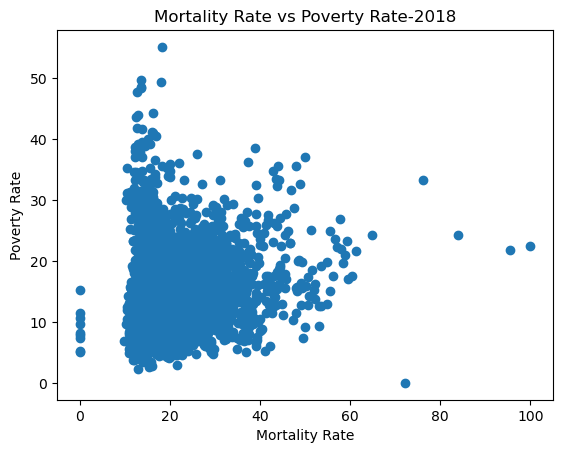

In [83]:
#  scatter plot MOR_18 aginst EP_POV
plt.scatter(mortality['MOR_18'], mortality['EP_POV'])
plt.xlabel('Mortality Rate')
plt.ylabel('Poverty Rate')
plt.title('Mortality Rate vs Poverty Rate-2018')
plt.show()



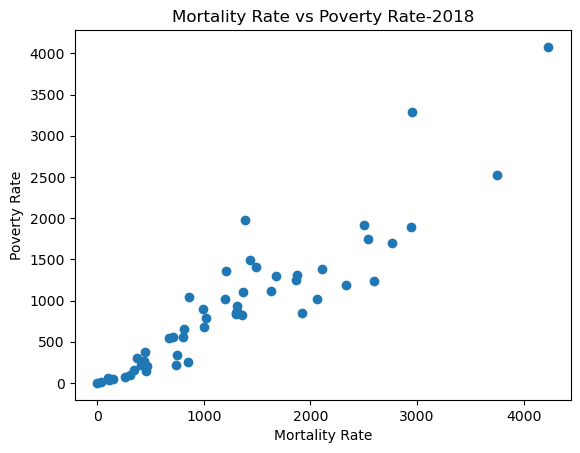

In [89]:
#  scatter plot MOR_18 aginst EP_POV
plt.scatter(state_df['MOR_18'], state_df['EP_POV'])
plt.xlabel('Mortality Rate')
plt.ylabel('Poverty Rate')
plt.title('Mortality Rate vs Poverty Rate-2018')
plt.show()